Download a Modis Aqua scene from http://modis.gsfc.nasa.gov/data/dataprod/

In [32]:
from a212utils.download import download_file
from IPython.display import Image
import h5py
import pandas as pd

download = False
if download:
    #
    #  satelite data for day 127 of 2014  Modis Aqua level 3 cloud data
    #
    url = 'http://clouds.eos.ubc.ca/~phil/Downloads/a212/fields.h5'
    local_file = download_file(url)
    print('downloaded {}'.format(local_file))
else:
    local_file='fields.h5'

/Users/phil/repos/A212/a212data/MYBRGB.A2014127.2110.005.2014128174940.jpg


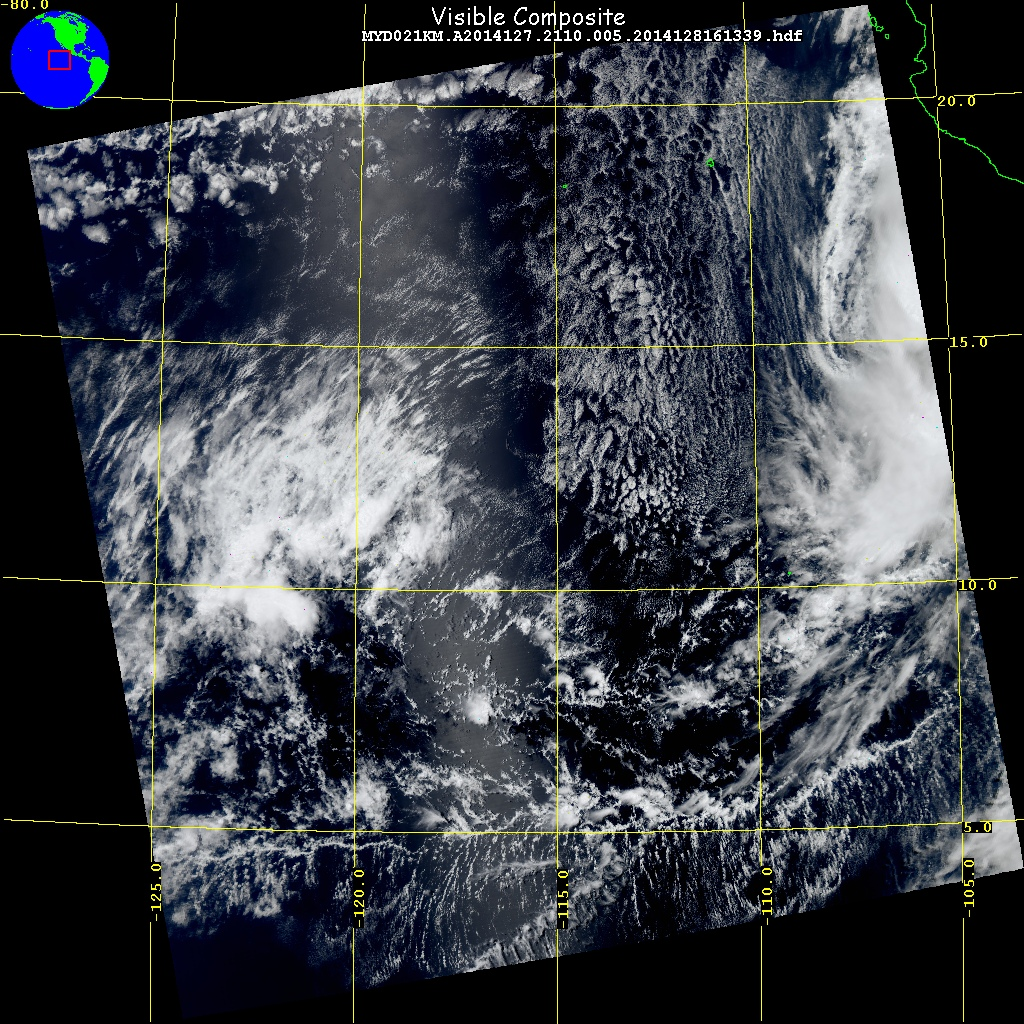

In [33]:
%matplotlib inline
from pathlib import Path
import a212data
picwidth = 800
datadir = a212data.__path__[0]
image_path = Path(datadir).joinpath('MYBRGB.A2014127.2110.005.2014128174940.jpg')
print(str(image_path))
Image(str(image_path),width=picwidth)

Use [h5py](http://docs.h5py.org/en/latest/)   to read the image data

In [34]:
from a212utils.h5dump import dumph5
if download:
    dumph5(local_file)

In [35]:
with h5py.File(local_file,'r') as f:
    file_dict = {}
    vars = ['ch29','ch31','cloud_mask','phase']
    for name in vars:
        fullname = '/A2014127/{}'.format(name)
        file_dict[name] = f[fullname][...]
    file_dict.update(f.attrs.items())

In [36]:
file_dict.keys()

dict_keys(['cloud_mask', 'ch29', 'ch31', 'mask_vals', 'phase', 'phase_vals'])

In [37]:
#
# make a 5 color palette
#
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap 
colors = ["royal blue", "baby blue", "eggshell", "burnt red", "soft pink"]
print([the_color for the_color in colors])
colors=[sns.xkcd_rgb[the_color] for the_color in colors]
pal=ListedColormap(colors,N=5)

['royal blue', 'baby blue', 'eggshell', 'burnt red', 'soft pink']


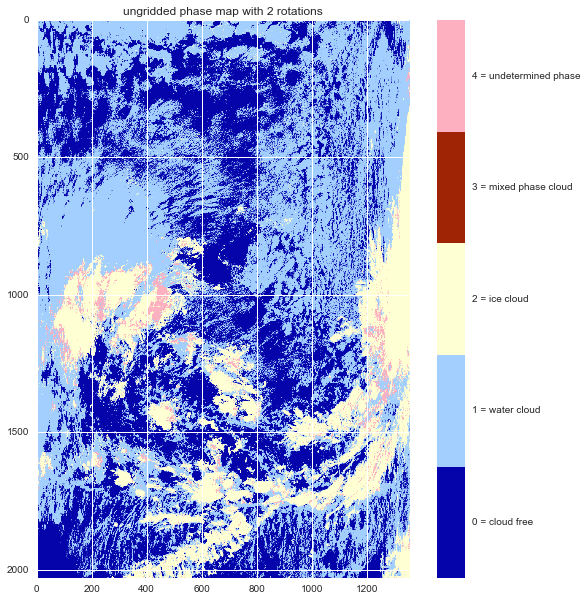

In [38]:
# #
# the A2014127.2110 scene is a descending orbit, so south is on top
# and west is on the right, need to rotate through 180 degrees
#
%matplotlib inline
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,10))
phase_rot=np.rot90(file_dict['phase'],2)
CS=ax.imshow(phase_rot,cmap=pal)
ax.set_title('ungridded phase map with 2 rotations')
cax=fig.colorbar(CS)
#
# we wrote the phase legend into the h5 attributes
# use it to label the color axis
#
labels=file_dict['phase_vals']
labels=labels.split(',')
ends=np.linspace(0,4,6)
centers=(ends[1:] + ends[:-1])/2.
cax.set_ticks(centers)
cax.set_ticklabels(labels)

{'two': 2, 'one': 1}


1

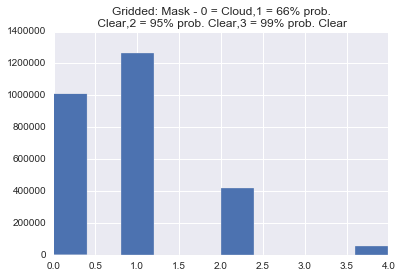

In [91]:
plt.close('all')
fig,ax=plt.subplots(1,1)
ax.hist(phase_rot.ravel())
ax.set_title('Gridded: Mask - 0 = Cloud,1 = 66% prob.\n Clear,2 = 95% prob. Clear,3 = 99% prob. Clear')

a=dict(one=1,two=2)
print(a)
a.loc['one',5:7]
b=make_tuple(a)
a.one

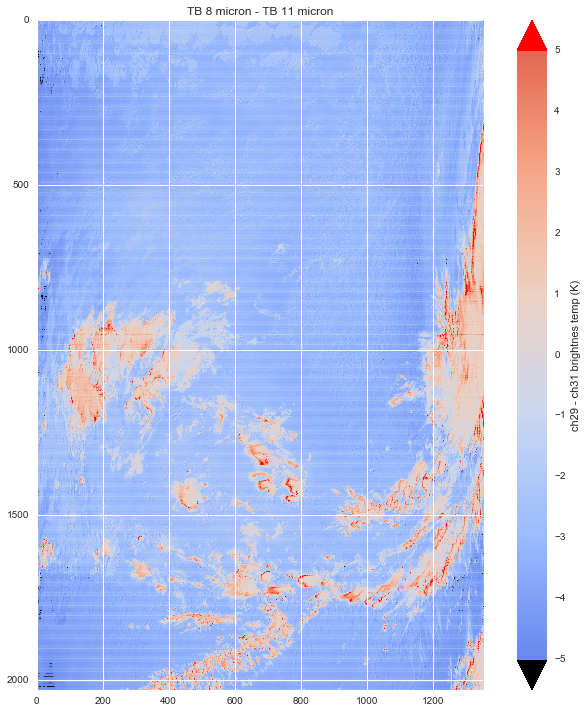

In [40]:
plt.close('all')
from matplotlib.colors import Normalize
from numpy import ma
fig,ax=plt.subplots(1,1,figsize=(12,12))
colors=sns.color_palette('coolwarm')
pal=LinearSegmentedColormap.from_list('test',colors)
pal.set_bad('0.75') #75% grey
pal.set_over('r')
pal.set_under('k')
vmin= -5.
vmax= 5.
ch29 = np.rot90(file_dict['ch29'],2)
ch31 = np.rot90(file_dict['ch31'],2)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)
tdiff= ch29 - ch31
tdiff=ma.array(tdiff,mask=np.isnan(tdiff))
CS= ax.imshow(tdiff,cmap=pal,norm=the_norm)
cax=plt.colorbar(CS,  ax = ax,extend='both')
cax.set_label('ch29 - ch31 brightnes temp (K)')
ax.set_title('TB 8 micron - TB 11 micron')




### For next Tuesday: check in a notebook that

1. Create a pandas Dataframe with 3 columns:  phase, ch29, ch31 using rows
   1100:1500 of the rotated image
   
2. Use groupby on the phase column to collect pixels with the same phase

3. Loop through each of the phases and calculate the mean ch29 and ch 31 values
   for that phase and the mean of the differences.
   
4. Write those results out as a new DataFrame with 5 columns (1 for each phase)
   and 1 row

In [46]:
the_slice=slice(1100,1500)
column_data = dict(phase=phase_rot[the_slice,:].ravel(),ch29=ch29[the_slice,:].ravel(),ch31=ch31[the_slice,:].ravel())

In [82]:
df_satellite = pd.DataFrame(column_data)
out = phase_rot[the_slice,:].flat
print(type(out))
df_satellite.columns

<class 'numpy.flatiter'>


Index(['ch29', 'ch31', 'phase'], dtype='object')

In [88]:
groups=df_satellite.groupby('phase')
the_groups = list(groups)
print(the_groups)

[(0,               ch29        ch31  phase
178     286.797852  288.407623      0
193     287.778839  289.351410      0
194     288.075012  289.637848      0
244     289.230408  291.728577      0
245     290.446442  292.584961      0
246     290.333160  292.512543      0
247     290.127350  292.300140      0
248     290.244507  292.403778      0
249     290.127350  292.294952      0
261     287.654144  289.712036      0
262     289.503113  291.613922      0
265     290.425232  292.641815      0
266     290.654938  292.920715      0
267     290.651398  292.956818      0
268     290.623138  292.884583      0
269     290.421661  292.636658      0
448     291.259460  293.794586      0
449     291.734192  294.106659      0
453     290.297699  292.636658      0
476     291.430847  294.193481      0
479     292.095276  294.748871      0
481     291.147339  294.086243      0
482     291.730713  294.433289      0
486     292.032898  294.642090      0
487     292.171417  294.880981      0
488    

In [89]:
data_frames=[]
chan_dict={}
for value in ['ch29','ch31']:
    chan_dict[value] = {}  
    for phase, group in groups:
        #save the mean for each phase
        chan_dict[value][phase] = group[value].mean()
df_dict={}
for value in ['ch29','ch31']:
    temps=list(chan_dict[value].values())
    names = list(chan_dict[value].keys())
    df_dict[value] = pd.DataFrame.from_records([temps],columns=names)
df_dict['Tdiff'] = df_dict['ch31'] - df_dict['ch29']

In [78]:
df_dict['Tdiff']

0         1         2         4
0  3.084686  2.876892 -0.719788  0.820129

### For next week

Check in a notebook that:

1) breaks the image into 16 subsets (4 x 4 in rows and columns)

2) write a function that produces a two new data frames for the the ch31 and  ch31 - ch29 mean temperature
   that have a column for each phase and 16 rows, one for each subset.
   
3) Make a scatterplot with 4 symbols (one for each phase) that plots ch31 on the x axis and ch31 - ch29 on the y axis